<a href="https://colab.research.google.com/github/Sampath7416/AutoImageColorization/blob/main/AutoImageColorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow 

In [3]:
#for uploading the img file
from google.colab import files
uploaded = files.upload()

Saving bshyam.jpeg to bshyam.jpeg


In [4]:
#search for the given photo
image=None  
for keys in uploaded.keys():
  image=keys
  

In [5]:
#loading the  model

!gdown 1hzb13B8UUxcc8hgGzukZNZHwqEDtItMY
!gdown 1EshSEknFNC0eknpyLk39N1x-PKRi4Vpv
!gdown 1F1Prs7yDhoQwIJ36Qa3a1dAqtd6F5UhT

Downloading...
From: https://drive.google.com/uc?id=1hzb13B8UUxcc8hgGzukZNZHwqEDtItMY
To: /content/colorization_deploy_v2.prototxt
100% 9.95k/9.95k [00:00<00:00, 11.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EshSEknFNC0eknpyLk39N1x-PKRi4Vpv
To: /content/colorization_release_v2.caffemodel
100% 129M/129M [00:05<00:00, 25.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F1Prs7yDhoQwIJ36Qa3a1dAqtd6F5UhT
To: /content/pts_in_hull.npy
100% 5.09k/5.09k [00:00<00:00, 7.53MB/s]


In [6]:

prototxt = "/content/colorization_deploy_v2.prototxt"
caffe_model = "/content/colorization_release_v2.caffemodel"
pts_npy = "/content/pts_in_hull.npy"

In [7]:
test_image=image

In [8]:
net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)

In [9]:
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

55
53


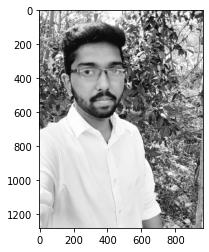

In [10]:
# Read image from the path
test_image = cv2.imread('/content/'+image)
# Convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Convert image from gray scale to RGB format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)
# Check image using matplotlib
plt.imshow(test_image)
plt.show()

In [11]:
# Normalizing the image
normalized= test_image.astype("float32") / 255.0
# Converting the image into LAB
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)
# Resizing the image
resized = cv2.resize(lab_image, (224, 224))
# Extracting the value of L for LAB image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50

In [12]:
# Setting input
net.setInput(cv2.dnn.blobFromImage(L))
# Finding the values of 'a' and 'b'
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
# Resizing
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


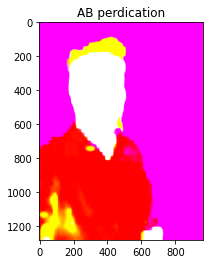

In [13]:
L = cv2.split(lab_image)[0]
# Combining L,a,b
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
# Checking the LAB image
plt.imshow(LAB_colored)
plt.title('AB perdication')
plt.show()

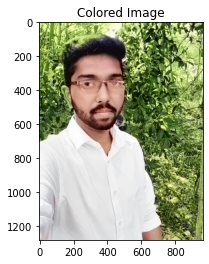

In [14]:
# Converting LAB image to RGB_colored
RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)
# Limits the values in array
RGB_colored = np.clip(RGB_colored, 0, 1)
# Changing the pixel intensity back to [0,255]
RGB_colored = (255 * RGB_colored).astype("uint8")
# Checking the image
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()